<a href="https://colab.research.google.com/github/shravyaM1/Assignment-6/blob/main/NN_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In class programming:


In [2]:
#@title Existing code Wiht out adding any additional Dense layers to the
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv('diabetes.csv', header=None).values
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print("********************************************") #just to identify the result printing this line
print(my_first_nn.evaluate(X_test, Y_test))

ModuleNotFoundError: ignored

In [ ]:
#@title Adding More Dense Layers to the Existing Code and Check the accuracy

my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer 1

#adding more layes
my_first_nn.add(Dense(10, input_dim=8, activation='relu')) # hidden layer 2
my_first_nn.add(Dense(5, input_dim=8, activation='relu')) # hidden layer 3
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer

my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))



Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 1.5851 - acc: 0.5972
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7130 - acc: 0.3837
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6942 - acc: 0.5729
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6832 - acc: 0.6337
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6734 - acc: 0.6510
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6635 - acc: 0.6580
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6468 - acc: 0.6615
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6471 - acc: 0.6615
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6412 - acc: 0.6615
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6292 - acc: 0.6615
Epoch 11/100
18/18 [==============================] - 0s 2m

In [3]:
#@title Changing the Dataset to Breast Cancer

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Loading the breast cancer dataset
dataset = pd.read_csv('breastcancer.csv')

# Extracting features and labels
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values
print(dataset.iloc[:, 1].value_counts())

# Encoding the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Defining the model architecture
model = Sequential()
model.add(Dense(20, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=100, verbose=0, initial_epoch=0)

# Printing the summary of the model
print(model.summary())

# Evaluating the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


B    357
M    212
Name: diagnosis, dtype: int64
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
5/5 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.9580
Test Loss: 0.15533922612667084
Test Accuracy: 0.9580419659614563


In [4]:
#@title Normalizing the data before feeding to the model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers.core import Dense

import pandas as pd

# Load the breast cancer dataset from CSV file
bc_dataset = pd.read_csv("breastcancer.csv")

# Extract features and labels
X = bc_dataset.iloc[:, 2:32].values
y = bc_dataset.iloc[:, 1].values
print(bc_dataset.iloc[:, 1].value_counts())

# Encode the categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale the input features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=0)

# Define the neural network model for breast cancer detection
bc_model = Sequential()
bc_model.add(Dense(20, input_dim=30, activation='relu')) # Hidden layer
bc_model.add(Dense(1, activation='sigmoid')) # Output layer
bc_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
bc_model.fit(X_train, y_train, epochs=100, verbose=0, initial_epoch=0)

# Print the model summary and evaluate its accuracy on the test set
print(bc_model.summary())
print(bc_model.evaluate(X_test, y_test))

ModuleNotFoundError: ignored

# 2: Use Image Classification on the hand written digits data set (mnist)


In [5]:
#@title In class program

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 8s 31ms/step - loss: 0.2852 - accuracy: 0.9137 - val_loss: 0.1318 - val_accuracy: 0.9590
Epoch 2/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0986 - accuracy: 0.9693 - val_loss: 0.1249 - val_accuracy: 0.9612
Epoch 3/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0621 - accuracy: 0.9801 - val_loss: 0.1140 - val_accuracy: 0.9654
Epoch 4/10
235/235 [==============================] - 10s 41ms/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0990 - val_accuracy: 0.9684
Epoch 5/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0584 - val_accuracy: 0.9818
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0845 - val_accuracy: 0.9766
Epoch 7/10
235/235 [==============================] - 5s 22ms/s

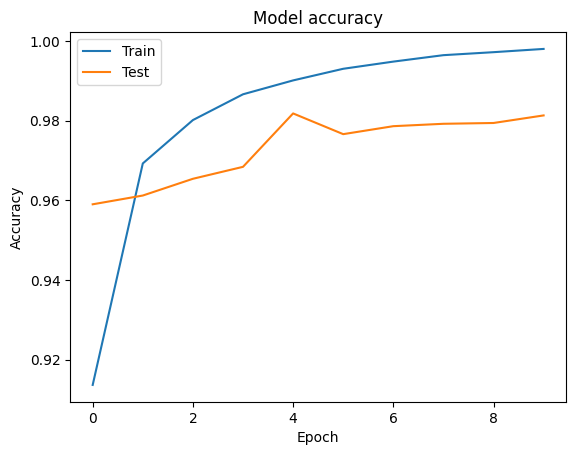

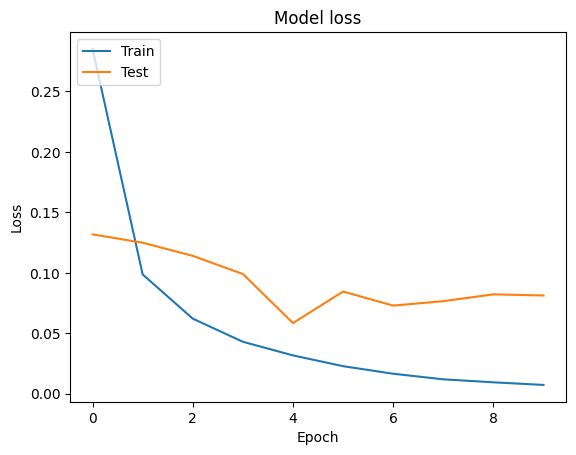

In [6]:
#@title Plot the loss and accuracy for both training data and validation data using the history object in the source code.
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

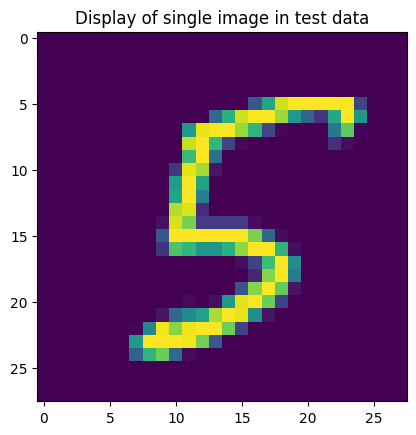

1/1 [==============================] - 0s 105ms/step

 The predicted single image in the test data is:  [[1.54973808e-18 6.46520661e-17 2.02587980e-17 7.76664757e-12
  5.42425504e-21 1.00000000e+00 1.51498036e-13 1.25426404e-19
  2.05620077e-14 1.30225995e-11]]


In [7]:
#@title Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

# plot the single image in the test data
plt.imshow(test_images[23].reshape(28,28))
plt.title('Display of single image in test data')
plt.show()

# get the prediction of the model on the above image in the test data
test_img_pred = model.predict(test_data[[23], :])
print("\n The predicted single image in the test data is: ", test_img_pred)


In [ ]:
#@title change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
model_1 = Sequential()
model_1.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_1.add(Dense(550, activation='tanh'))
model_1.add(Dense(600, activation='tanh'))
model_1.add(Dense(612, activation='tanh'))
model_1.add(Dense(10, activation='sigmoid'))

model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=15, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model_1.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))

Epoch 1/15
235/235 [==============================] - 14s 55ms/step - loss: 0.4739 - accuracy: 0.8597 - val_loss: 0.4600 - val_accuracy: 0.8644
Epoch 2/15
235/235 [==============================] - 12s 53ms/step - loss: 0.1593 - accuracy: 0.9510 - val_loss: 0.1923 - val_accuracy: 0.9418
Epoch 3/15
235/235 [==============================] - 14s 58ms/step - loss: 0.1038 - accuracy: 0.9681 - val_loss: 0.1263 - val_accuracy: 0.9618
Epoch 4/15
235/235 [==============================] - 14s 62ms/step - loss: 0.0706 - accuracy: 0.9781 - val_loss: 0.0959 - val_accuracy: 0.9708
Epoch 5/15
235/235 [==============================] - 13s 54ms/step - loss: 0.0521 - accuracy: 0.9832 - val_loss: 0.0731 - val_accuracy: 0.9772
Epoch 6/15
235/235 [==============================] - 13s 54ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.1443 - val_accuracy: 0.9587
Epoch 7/15
235/235 [==============================] - 13s 53ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0661 - val_accuracy:

In [ ]:
#@title Run the same code without scaling the images and check the performance
